In [1]:
from selenium import webdriver
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker. Data contains of numerical and categorical values

# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(32560, 15)

In [4]:
print("Number of rows=",df.shape[0])
print("Number of columns=",df.shape[1])

Number of rows= 32560
Number of columns= 15


In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

It denotes name of all 15 columns

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

The given columns has two data types (int64, object)

In [7]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can see that
1. There are no null values as count for all columns having numerical values is same.

## Data Cleaning

<AxesSubplot:>

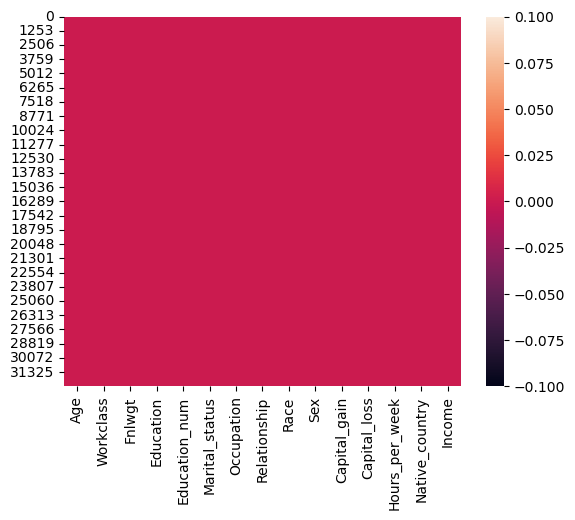

In [10]:
# Let's visualize if there are null values or not using heat map!!
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

From above it is clear that it has no null values

In [12]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


We can see that 'Education' is in categorical form and 'Education_num' is its numerical equivalent with values shown below. So lets drop 'Education' as it is in categorical form.

1: Preschool 2: 1st-4th, 3: 5th-6th, 4: 7th-8th, 5: 9th, 6: 10th, 7: 11th, 8: 12th, 9: HS-grad,

10: Some-college, 11: Assoc-voc, 12: Assoc-acdm, 13: Bachelors, 14: Masters, 15: Prof-school, 16: Doctorate

In [13]:
df.drop('Education',inplace=True, axis=1)

In [14]:
# Lets check for duplicate values
df.duplicated().sum()

24

In [15]:
print("Number of duplicate values before =",df.duplicated().sum())

Number of duplicate values before = 24


In [16]:
#Lets remove duplicate values
df=df[~df.duplicated()]

In [17]:
print("Number of duplicate values after =",df.duplicated().sum())

Number of duplicate values after = 0


In [18]:
df.tail(20)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32540,41,?,202822,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32541,72,?,129912,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32542,45,Local-gov,119199,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32543,31,Private,199655,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32544,39,Local-gov,111499,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32545,37,Private,198216,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32546,43,Private,260761,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32547,65,Self-emp-not-inc,99359,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32548,43,State-gov,255835,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32549,43,Self-emp-not-inc,27242,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


We can also see that some values in 'Workclass' and 'Occupation' columns have values as '?'. So lets delete that rows having '?' values

In [19]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [21]:
# Lets remove '?' values
df.drop(df[df['Occupation'] == ' ?'].index,inplace=True)

In [22]:

df.drop(df[df['Workclass'] == ' ?'].index,inplace=True)

In [23]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [24]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

We can see that all '?' values are removed !!!!

## Data Visualization 

<AxesSubplot:xlabel='Income', ylabel='count'>

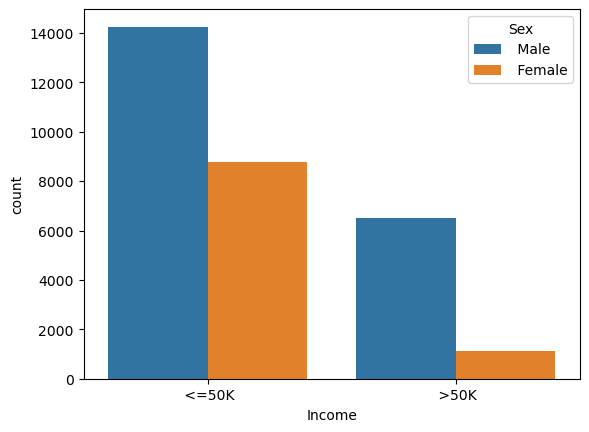

In [28]:
sns.countplot(df['Income'],hue='Sex', data=df)

We can see that males are more then females. Males are dominating in less or more than 50k in income

<AxesSubplot:xlabel='Income', ylabel='count'>

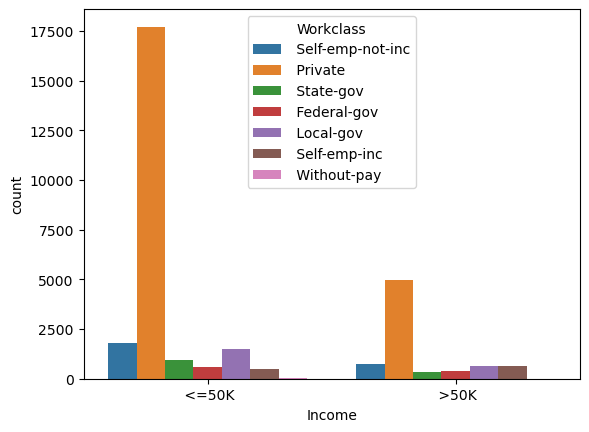

In [30]:
sns.countplot(df['Income'],hue='Workclass', data=df)

people having more then 50 k are from private workclass

<AxesSubplot:xlabel='Income', ylabel='count'>

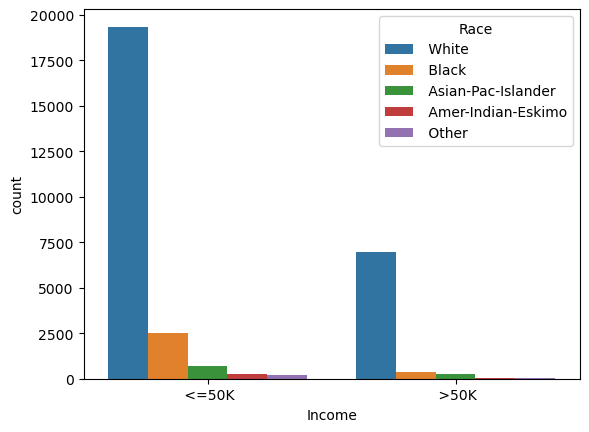

In [31]:
sns.countplot(df['Income'],hue='Race', data=df)

White race peoples are having income less then 50 k and also more then 50k

<AxesSubplot:xlabel='Income', ylabel='count'>

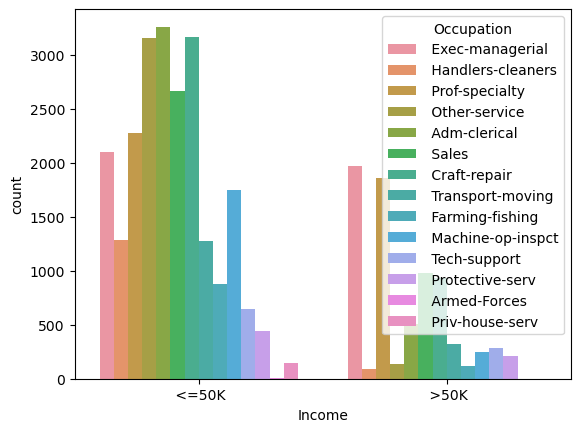

In [32]:
sns.countplot(df['Income'],hue='Occupation', data=df)

We can see that people income is evenly distributed based on occupation

<AxesSubplot:xlabel='Income', ylabel='count'>

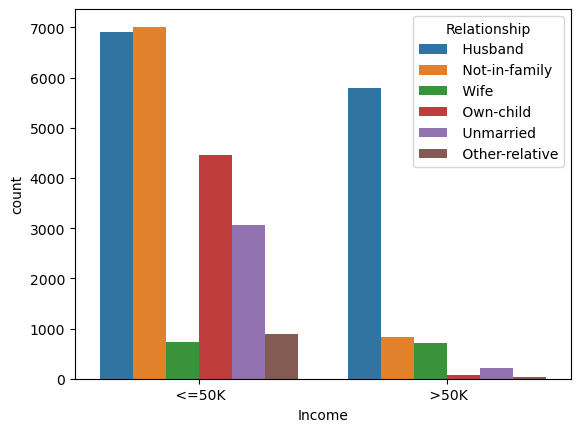

In [33]:
sns.countplot(df['Income'],hue='Relationship', data=df)

We see that people having less than 50 k are mostly Husband, Not in Family, whereas people having ncome more than 50k are husband

## Converting categorical values into numerical values

In [41]:
df['Race']=df['Race'].replace('White',0)
df['Race']=df['Race'].replace('Black',1)
df['Race']=df['Race'].replace('Asian-Pac-Islander',2)
df['Race']=df['Race'].replace('Amer-Indian-Eskimo',3)
df['Race']=df['Race'].replace('Other',5)

In [46]:
from sklearn.preprocessing import LabelEncoder

In [51]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Workclass'] = encoder.fit_transform(df['Workclass'])
df['Marital_status'] = encoder.fit_transform(df['Marital_status'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['Relationship'] = encoder.fit_transform(df['Relationship'])
df['Race'] = encoder.fit_transform(df['Race'])
df['Native_country'] = encoder.fit_transform(df['Native_country'])
df['Income'] = encoder.fit_transform(df['Income'])


In [52]:
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,13,2,3,0,4,1,0,0,13,39,0
1,38,2,215646,9,0,5,1,4,1,0,0,40,39,0
2,53,2,234721,7,2,5,0,2,1,0,0,40,39,0
3,28,2,338409,13,2,9,5,2,0,0,0,40,5,0
4,37,2,284582,14,2,3,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,12,2,12,5,4,0,0,0,38,39,0
32556,40,2,154374,9,2,6,0,4,1,0,0,40,39,1
32557,58,2,151910,9,6,0,4,4,0,0,0,40,39,0
32558,22,2,201490,9,4,0,3,4,1,0,0,20,39,0


# seperating target variable and other variables

In [54]:
X=df.drop(columns =['Income'])
Y=df['Income']

In [58]:
print(X)

       Age  Workclass  Fnlwgt  Education_num  Marital_status  Occupation  \
0       50          4   83311             13               2           3   
1       38          2  215646              9               0           5   
2       53          2  234721              7               2           5   
3       28          2  338409             13               2           9   
4       37          2  284582             14               2           3   
...    ...        ...     ...            ...             ...         ...   
32555   27          2  257302             12               2          12   
32556   40          2  154374              9               2           6   
32557   58          2  151910              9               6           0   
32558   22          2  201490              9               4           0   
32559   52          3  287927              9               2           3   

       Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  \
0        

In [59]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 30693, dtype: int32


# Machine Learning Algorithm

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=43)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (20564, 13)
Training target vector size: (20564,)
Test feature matrix size: (10129, 13)
Test target vector size: (10129,)


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.39, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.2748025634496123 on Random_state 103


# Linear Regression Matrix

In [64]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 Error :
Mean absolute error : 0.2992683412660947
Mean squared error : 0.1360899595546977
Root Mean Squared Error: 0.36890372667499266


 R2 Score :
0.27129704646762187


# Applying Other Regression Model

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [68]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

model = [rf,svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
                                            
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))

    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('\n')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.1956235903433297
Mean squared error : 0.10429817893242001
Root Mean Squared Error: 0.32295228584485974


 R2 Score :
0.4415283002155952


 Error of  SVR() :
Mean absolute error : 0.279309673129653
Mean squared error : 0.18030840118241662
Root Mean Squared Error: 0.42462736744399393


 R2 Score :
0.034526390350503866


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.1901261381672375
Mean squared error : 0.1901261381672375
Root Mean Squared Error: 0.43603456074861485


 R2 Score :
-0.0180433507329123


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.2894746930957708
Mean squared error : 0.12344458024979485
Root Mean Squared Error: 0.3513468090787148


 R2 Score :
0.33900759086172394




From the above, we can see that RandomForestRegressor has maximum R2 score

### Predicting income

In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.39, random_state=32)
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
rfr.score(X_train,Y_train)
y_pred=rfr.predict(X_test)
print('Predicted result income:\n', y_pred)
print('\n')
print('actual income\n',Y_test)

Predicted result price:
 [0.56 0.03 0.55 ... 0.   0.02 0.14]


actual price
 2244     1
11608    0
15527    1
15637    0
27557    0
        ..
26574    0
128      0
43       0
8180     0
14298    1
Name: Income, Length: 11971, dtype: int32
